# 0. Imports

In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from sklearn.preprocessing import MinMaxScaler
import pickle
from sklearn import metrics as m
from sklearn import cluster as c
from sklearn import mixture as mx
from sklearn import decomposition as dd
from sklearn import manifold as mn
import umap.umap_ as umap

# 1. Data Load

In [ ]:
customer_df = pd.read_csv("../dataset/clustering_customer.csv")
features_df= pd.read_csv("../dataset/clustering_features.csv")
payment_df= pd.read_csv("../dataset/clustering_payment.csv")
product_df= pd.read_csv("../dataset/clustering_product.csv")

In [4]:
customer_df.shape, features_df.shape, product_df.shape, payment_df.shape

((1000, 5), (1000, 27), (22, 3), (5, 2))

In [5]:
customer_df.head()

,customer_id,age,hh_income,omni_shopper,email_subscribed
0,1,46,640000,0,0
1,2,32,890000,1,1
2,3,45,772000,0,0
3,4,46,303000,0,1
4,5,38,412000,0,0


In [84]:
pd.set_option("display.max_columns", None)
features_df.head()


,customer_id,sales,units,orders,unique_products_bought,unique_payments_used,unique_categories_bought,aov,aur,upt,category_a_sales,category_b_sales,category_c_sales,category_d_sales,category_e_sales,category_a_units,category_b_units,category_c_units,category_d_units,category_e_units,payment_cash,payment_credit,payment_debit,payment_gc,payment_others,email_subscribed,omni_shopper
0,1,2395,11,5,5,3,3,479.000000,217.727273,2.200000,0.480167,NaN,0.450939,NaN,0.068894,0.363636,NaN,0.363636,NaN,0.272727,NaN,0.519833,0.167015,0.313152,NaN,False,False
1,2,4815,15,7,6,4,3,687.857143,321.000000,2.142857,0.721703,NaN,0.247144,NaN,0.031153,0.466667,NaN,0.333333,NaN,0.200000,0.031153,0.704050,0.186916,0.077882,NaN,True,True
2,3,4285,21,10,9,4,5,428.500000,204.047619,2.100000,0.240373,0.175029,0.309218,0.210035,0.065344,0.190476,0.238095,0.238095,0.095238,0.238095,NaN,0.263711,0.309218,0.147025,0.280047,False,False
3,4,12000,44,21,15,4,5,571.428571,272.727273,2.095238,0.575000,0.067500,0.158333,0.170833,0.028333,0.409091,0.159091,0.181818,0.113636,0.136364,0.066667,0.345000,0.370000,0.218333,NaN,True,False
4,5,1700,8,3,3,2,2,566.666667,212.500000,2.666667,NaN,0.264706,0.735294,NaN,NaN,NaN,0.375000,0.625000,NaN,NaN,NaN,NaN,0.735294,0.264706,NaN,False,False


In [87]:
product_df.head()

,product_id,category,price
0,True,A,450
1,True,B,80
2,True,C,250
3,True,D,400
4,True,E,50


In [83]:
payment_df.head()

,payment_type_id,payment_type
0,True,cash
1,True,credit card
2,True,debit card
3,True,gift card
4,True,others


# 2. Descriptive Analysis & Missing values handling

## 2.1 Data type handling

In [13]:
features_df.dtypes

customer_id                   int64
sales                         int64
units                         int64
orders                        int64
unique_products_bought        int64
unique_payments_used          int64
unique_categories_bought      int64
aov                         float64
aur                         float64
upt                         float64
category_a_sales            float64
category_b_sales            float64
category_c_sales            float64
category_d_sales            float64
category_e_sales            float64
category_a_units            float64
category_b_units            float64
category_c_units            float64
category_d_units            float64
category_e_units            float64
payment_cash                float64
payment_credit              float64
payment_debit               float64
payment_gc                  float64
payment_others              float64
email_subscribed              int64
omni_shopper                  int64
dtype: object

In [30]:
binary_cols = ['omni_shopper', 'email_subscribed']
string_cols = ['customer_id']


features_df[binary_cols] = features_df[binary_cols].astype(bool)
features_df[string_cols] = features_df[string_cols].astype(str)

In [16]:
customer_df.dtypes

customer_id         int64
age                 int64
hh_income           int64
omni_shopper        int64
email_subscribed    int64
dtype: object

In [23]:
customer_df[binary_cols] = customer_df[binary_cols].astype(bool)
customer_df[string_cols] = customer_df[string_cols].astype(str)

In [25]:
payment_df.dtypes

payment_type_id     int64
payment_type       object
dtype: object

In [34]:
binary_cols_payment = ['payment_type_id']
payment_df[binary_cols_payment] = payment_df[binary_cols_payment].astype(str)

In [31]:
product_df.dtypes

product_id     int64
category      object
price          int64
dtype: object

In [35]:
binary_cols_product = ['product_id']

product_df[binary_cols_product] = product_df[binary_cols_product].astype(str)

In [33]:
product_df.dtypes

product_id      bool
category      object
price          int64
dtype: object

## 2.2 Handling null values

In [36]:
features_df.isnull().sum()

customer_id                   0
sales                         0
units                         0
orders                        0
unique_products_bought        0
unique_payments_used          0
unique_categories_bought      0
aov                           0
aur                           0
upt                           0
category_a_sales             89
category_b_sales            246
category_c_sales            171
category_d_sales            322
category_e_sales            329
category_a_units             89
category_b_units            246
category_c_units            171
category_d_units            322
category_e_units            329
payment_cash                737
payment_credit               19
payment_debit               129
payment_gc                  366
payment_others              744
email_subscribed              0
omni_shopper                  0
dtype: int64

In [51]:
features_df2 = features_df.copy()
product_df2 = product_df.copy()
payment_df2 = payment_df.copy()
customer_df2 = customer_df.copy()



features_df2 = features_df2.fillna(0)

In [37]:
product_df2.isnull().sum()

product_id    0
category      0
price         0
dtype: int64

In [41]:
customer_df2.isnull().sum()

customer_id         0
age                 0
hh_income           0
omni_shopper        0
email_subscribed    0
dtype: int64

In [42]:
payment_df2.isnull().sum()

payment_type_id    0
payment_type       0
dtype: int64

In [52]:
features_df2.describe().T


,count,mean,std,min,25%,50%,75%,max
sales,1000.0,5707.170000,4036.079859,330.0,2827.500000,4280.000000,7267.500000,17635.000000
units,1000.0,21.108000,14.408398,3.0,11.000000,16.000000,23.000000,58.000000
orders,1000.0,9.811000,6.384986,3.0,5.000000,8.000000,10.000000,24.000000
unique_products_bought,1000.0,7.547000,3.850535,2.0,5.000000,6.000000,9.000000,18.000000
unique_payments_used,1000.0,3.005000,0.948617,1.0,2.000000,3.000000,4.000000,5.000000
unique_categories_bought,1000.0,3.843000,1.014584,1.0,3.000000,4.000000,5.000000,5.000000
aov,1000.0,575.336384,165.741267,110.0,467.500000,568.444444,670.238095,1202.500000
aur,1000.0,271.150530,65.941495,60.0,227.836538,268.178138,311.271777,485.000000
upt,1000.0,2.124689,0.344007,1.0,1.900000,2.139610,2.333333,3.666667
category_a_sales,1000.0,0.423622,0.232920,0.0,0.270173,0.428711,0.585021,1.000000


# 3. Feature Engineering

In [53]:
features_df3 = features_df2.copy()
product_df3 = product_df2.copy()
payment_df3 = payment_df2.copy()
customer_df3 = customer_df2.copy()

In [85]:
pd.set_option("display.max_columns", None)
features_df3.head()

,customer_id,sales,units,orders,unique_products_bought,unique_payments_used,unique_categories_bought,aov,aur,upt,category_a_sales,category_b_sales,category_c_sales,category_d_sales,category_e_sales,category_a_units,category_b_units,category_c_units,category_d_units,category_e_units,payment_cash,payment_credit,payment_debit,payment_gc,payment_others,email_subscribed,omni_shopper,category_buy_rate,payment_use_rate,product_buy_rate
0,1,2395,11,5,5,3,3,479.000000,217.727273,2.200000,0.480167,0.000000,0.450939,0.000000,0.068894,0.363636,0.000000,0.363636,0.000000,0.272727,0.000000,0.519833,0.167015,0.313152,0.000000,False,False,0.6,0.6,0.227273
1,2,4815,15,7,6,4,3,687.857143,321.000000,2.142857,0.721703,0.000000,0.247144,0.000000,0.031153,0.466667,0.000000,0.333333,0.000000,0.200000,0.031153,0.704050,0.186916,0.077882,0.000000,True,True,0.6,0.8,0.272727
2,3,4285,21,10,9,4,5,428.500000,204.047619,2.100000,0.240373,0.175029,0.309218,0.210035,0.065344,0.190476,0.238095,0.238095,0.095238,0.238095,0.000000,0.263711,0.309218,0.147025,0.280047,False,False,1.0,0.8,0.409091
3,4,12000,44,21,15,4,5,571.428571,272.727273,2.095238,0.575000,0.067500,0.158333,0.170833,0.028333,0.409091,0.159091,0.181818,0.113636,0.136364,0.066667,0.345000,0.370000,0.218333,0.000000,True,False,1.0,0.8,0.681818
4,5,1700,8,3,3,2,2,566.666667,212.500000,2.666667,0.000000,0.264706,0.735294,0.000000,0.000000,0.000000,0.375000,0.625000,0.000000,0.000000,0.000000,0.000000,0.735294,0.264706,0.000000,False,False,0.4,0.4,0.136364


In [76]:
total_categories = product_df3['category'].nunique()
total_payment = product_df3['category'].nunique()
total_products = len(product_df3['category'])


In [ ]:
#Adding new features

# They will indicate a % rate from all available options each customer have used once
features_df3['category_buy_rate'] = features_df3['unique_categories_bought']/total_categories
features_df3['payment_use_rate'] = features_df3['unique_payments_used']/total_payment
features_df3['product_buy_rate'] = features_df3['unique_products_bought']/total_products

In [105]:
features_df3 = features_df3.merge(
    customer_df3[['customer_id', 'age', 'hh_income']],
    on="customer_id",
    how="left"
);
features_df3.head()

,customer_id,sales,units,orders,unique_products_bought,unique_payments_used,unique_categories_bought,aov,aur,upt,category_a_sales,category_b_sales,category_c_sales,category_d_sales,category_e_sales,category_a_units,category_b_units,category_c_units,category_d_units,category_e_units,payment_cash,payment_credit,payment_debit,payment_gc,payment_others,email_subscribed,omni_shopper,category_buy_rate,payment_use_rate,product_buy_rate,age,hh_income
0,1,2395,11,5,5,3,3,479.000000,217.727273,2.200000,0.480167,0.000000,0.450939,0.000000,0.068894,0.363636,0.000000,0.363636,0.000000,0.272727,0.000000,0.519833,0.167015,0.313152,0.000000,False,False,0.6,0.6,0.227273,46,640000
1,2,4815,15,7,6,4,3,687.857143,321.000000,2.142857,0.721703,0.000000,0.247144,0.000000,0.031153,0.466667,0.000000,0.333333,0.000000,0.200000,0.031153,0.704050,0.186916,0.077882,0.000000,True,True,0.6,0.8,0.272727,32,890000
2,3,4285,21,10,9,4,5,428.500000,204.047619,2.100000,0.240373,0.175029,0.309218,0.210035,0.065344,0.190476,0.238095,0.238095,0.095238,0.238095,0.000000,0.263711,0.309218,0.147025,0.280047,False,False,1.0,0.8,0.409091,45,772000
3,4,12000,44,21,15,4,5,571.428571,272.727273,2.095238,0.575000,0.067500,0.158333,0.170833,0.028333,0.409091,0.159091,0.181818,0.113636,0.136364,0.066667,0.345000,0.370000,0.218333,0.000000,True,False,1.0,0.8,0.681818,46,303000
4,5,1700,8,3,3,2,2,566.666667,212.500000,2.666667,0.000000,0.264706,0.735294,0.000000,0.000000,0.000000,0.375000,0.625000,0.000000,0.000000,0.000000,0.000000,0.735294,0.264706,0.000000,False,False,0.4,0.4,0.136364,38,412000


# 4.0 EDA

In [106]:
features_df4 = features_df3.copy()
product_df4 = product_df3.copy()
payment_df4 = payment_df3.copy()
customer_df4 = customer_df3.copy()

## 4.1 Hypothesis Mindmap

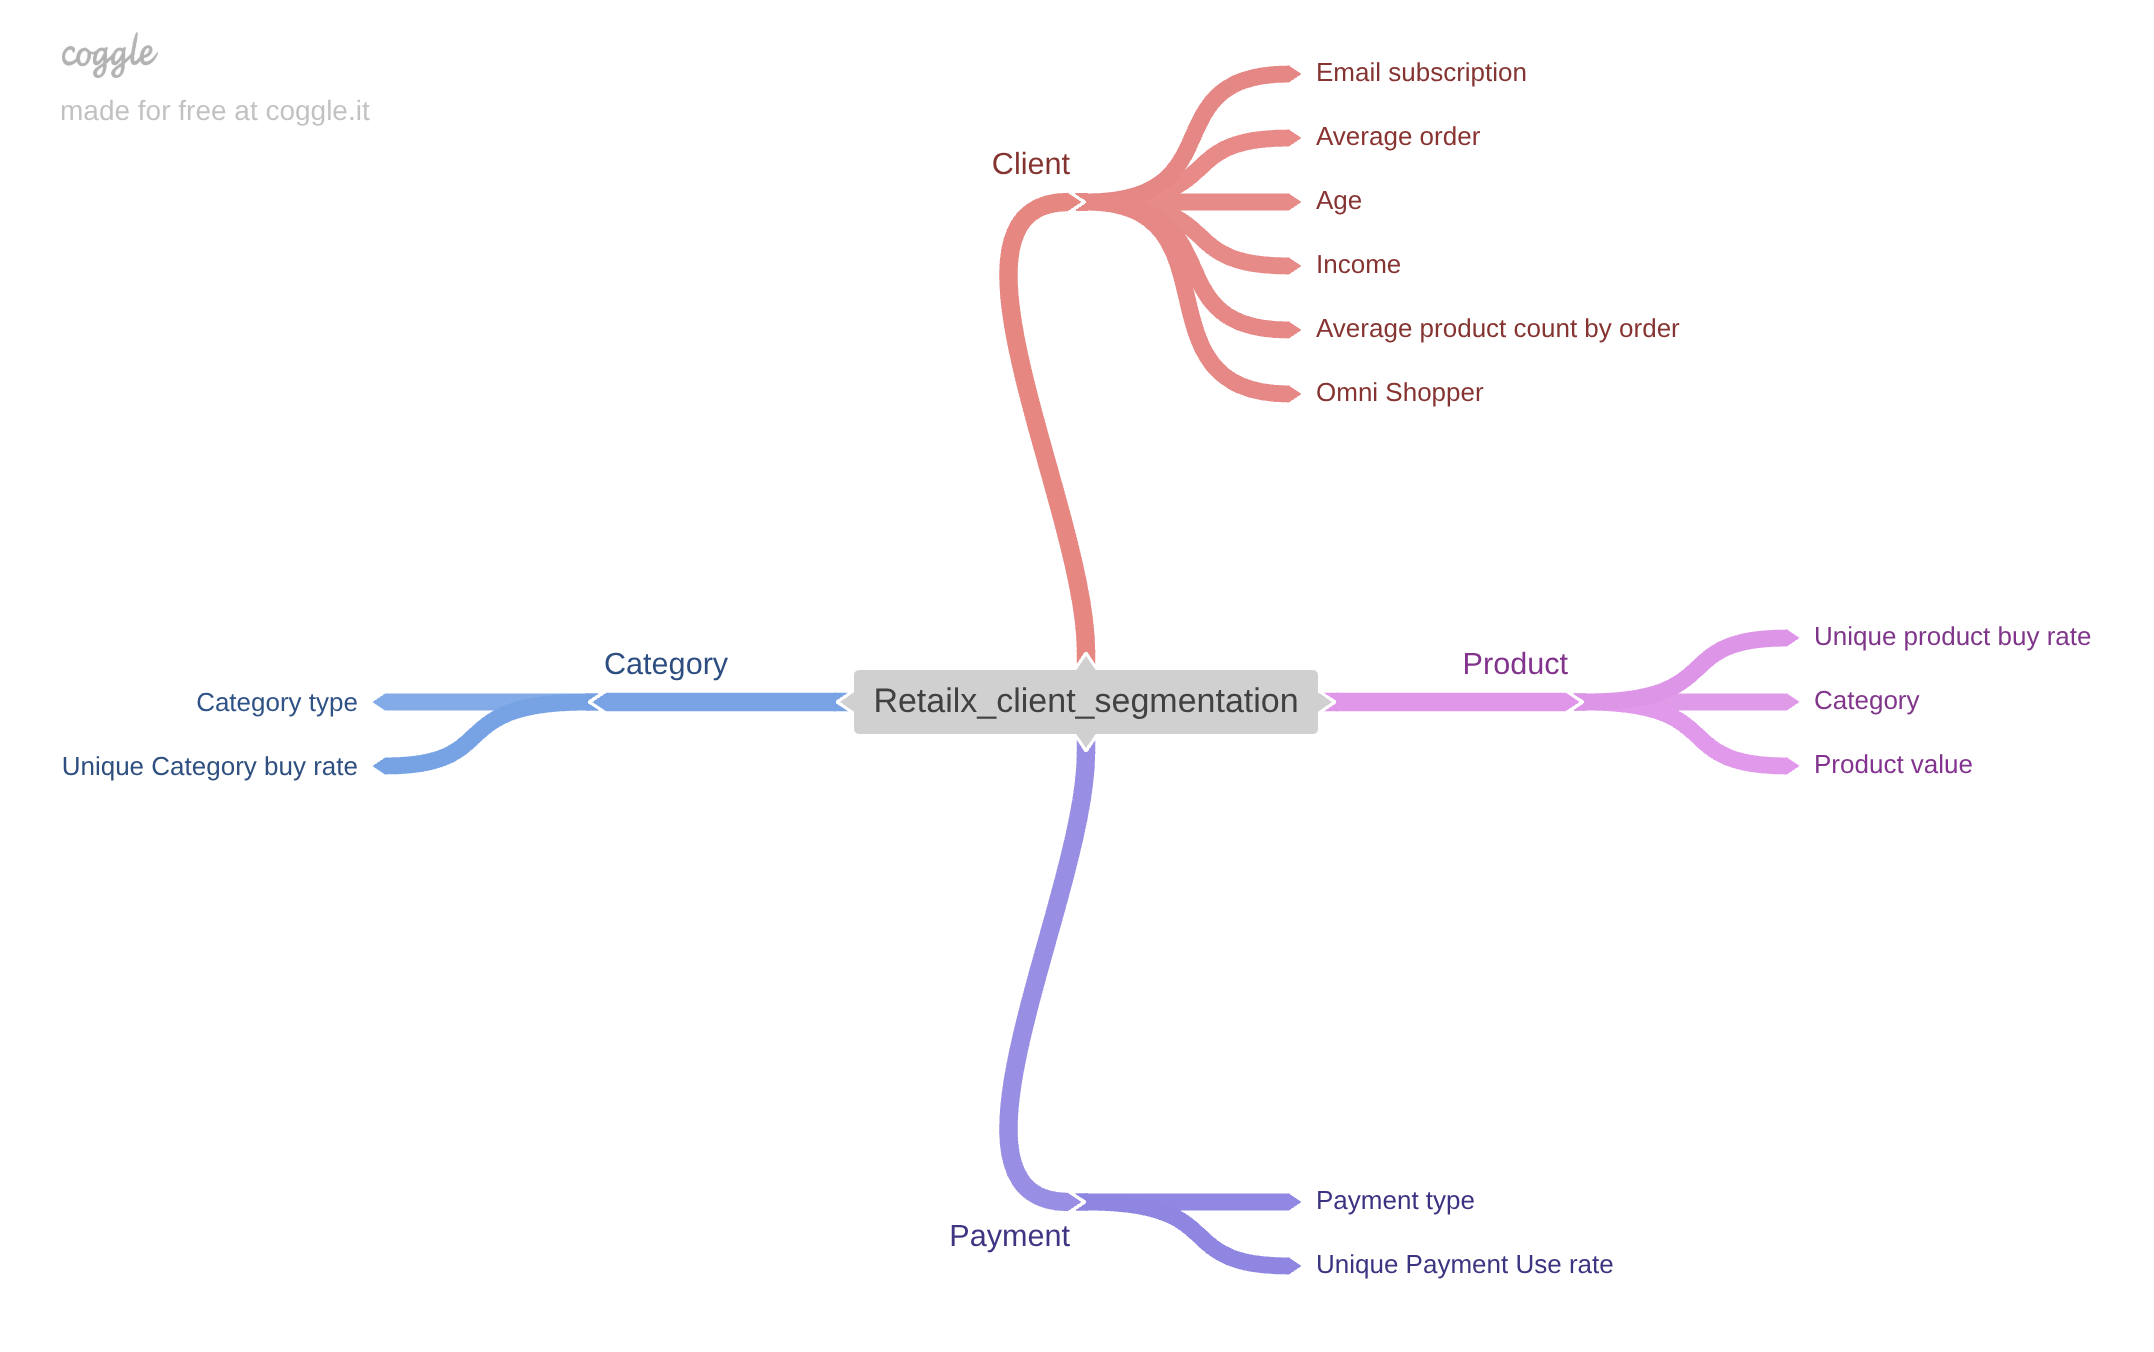

In [91]:
Image('../images/Retailx_client_segmentation.png')

## 4.2 Univariate Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

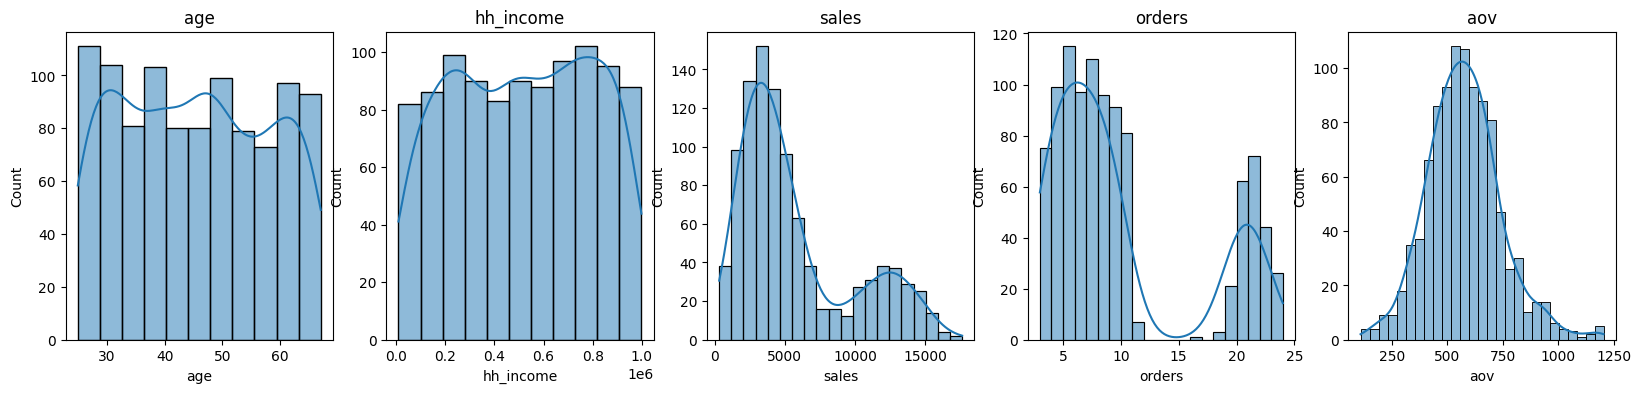

In [108]:
fig, axes = plt.subplots(1,5,figsize=(20,4))

columns = ['age','hh_income','sales','orders','aov']

for ax,col in zip(axes,columns):
    sns.histplot(features_df4[col], kde = True, ax=ax)
    ax.set_title(col)

plt.show

## 4.3 Bivariate Analysis

In [ ]:
# Age by average order value

# Unique product category rate by sales

# Email asigned by sales

# Omnichannel by orders

Text(0.5, 1.0, 'Age by average order value')

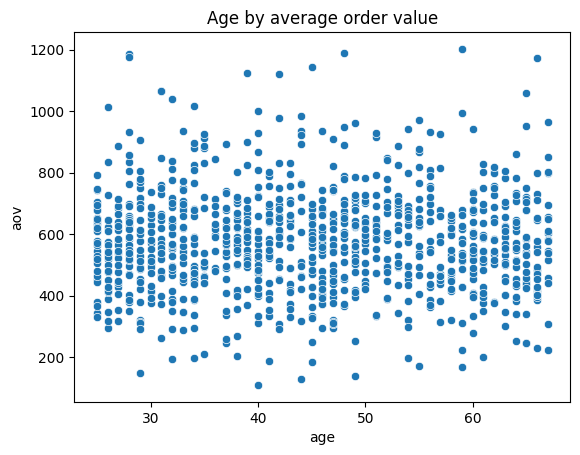

In [118]:
sns.scatterplot(data=features_df4, x='age', y = 'aov')
plt.title('Age by average order value')

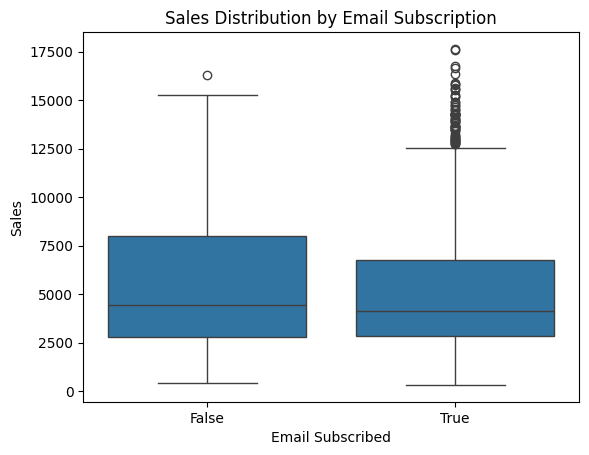

In [128]:
sns.boxplot(data=features_df3, x='email_subscribed', y='sales')
plt.title('Sales Distribution by Email Subscription')
plt.xlabel('Email Subscribed')
plt.ylabel('Sales')
plt.show()

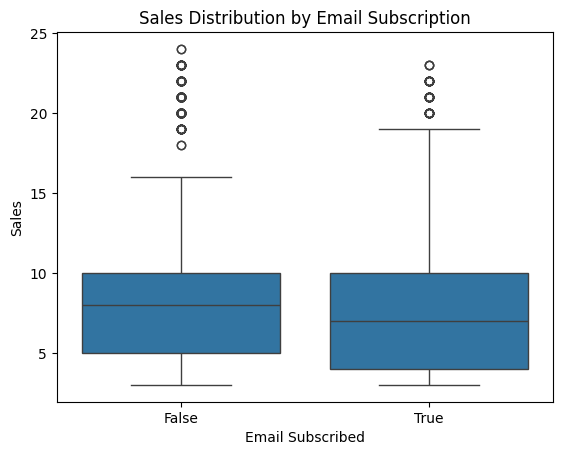

In [129]:
sns.boxplot(data=features_df4, x='omni_shopper', y='orders')
plt.title('Sales Distribution by Email Subscription')
plt.xlabel('Email Subscribed')
plt.ylabel('Sales')
plt.show()

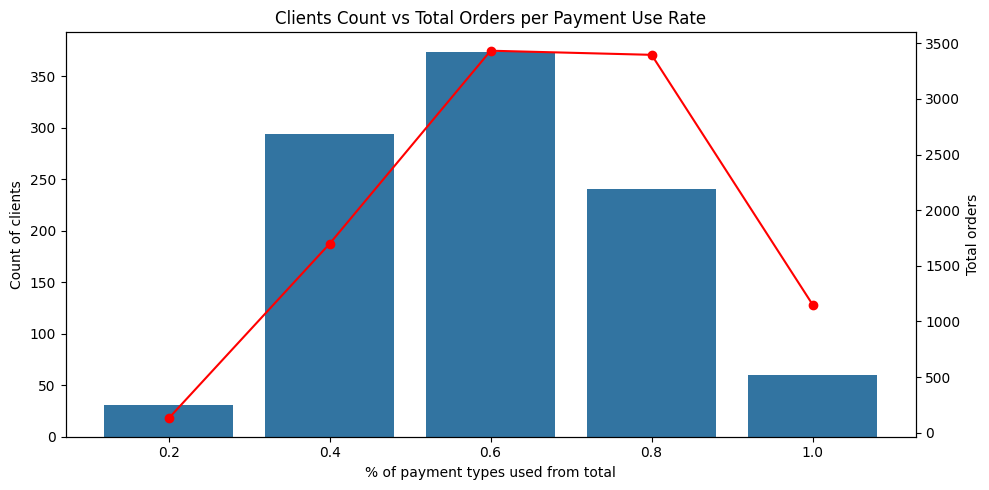

In [140]:
categories = sorted(features_df4['payment_use_rate'].unique())

orders_by_rate = (
    features_df4
    .groupby('payment_use_rate', as_index=False)['orders']
    .sum()
    .sort_values('payment_use_rate')
)

fig, ax1 = plt.subplots(figsize=(10, 5))

sns.countplot(
    data=features_df4,
    x='payment_use_rate',
    order=categories,
    ax=ax1
)

ax1.set_xlabel('% of payment types used from total')
ax1.set_ylabel('Count of clients')
ax1.set_title('Clients Count vs Total Orders per Payment Use Rate')

ax2 = ax1.twinx()

x_positions = range(len(categories))

ax2.plot(
    x_positions,
    orders_by_rate['orders'],
    marker='o',
    color='red'
)

ax2.set_ylabel('Total orders')
ax2.set_xticks(x_positions)
ax2.set_xticklabels(categories)

plt.tight_layout()
plt.show()


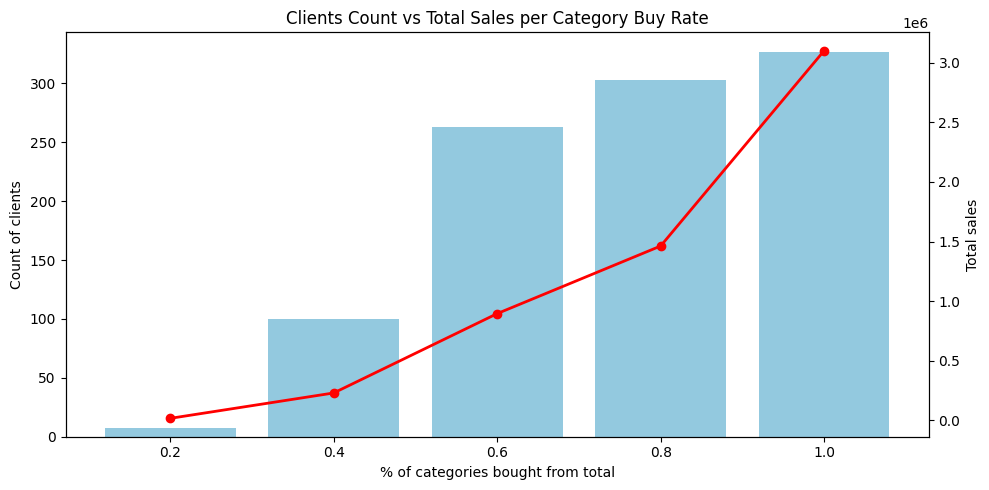

In [141]:
categories = sorted(features_df4['category_buy_rate'].unique())

sales_by_rate = (
    features_df4
    .groupby('category_buy_rate', as_index=False)['sales']
    .sum()
    .sort_values('category_buy_rate')
)

fig, ax1 = plt.subplots(figsize=(10, 5))

sns.countplot(
    data=features_df4,
    x='category_buy_rate',
    order=categories,
    ax=ax1,
    color='skyblue'
)

ax1.set_xlabel('% of categories bought from total')
ax1.set_ylabel('Count of clients')
ax1.set_title('Clients Count vs Total Sales per Category Buy Rate')

ax2 = ax1.twinx()

x_positions = range(len(categories))

ax2.plot(
    x_positions,
    sales_by_rate['sales'],
    marker='o',
    color='red',
    linewidth=2
)

ax2.set_ylabel('Total sales')
ax2.set_xticks(x_positions)
ax2.set_xticklabels(categories)

plt.tight_layout()
plt.show()

In [136]:
print(sorted(features_df4['payment_use_rate'].unique()))
print(orders_by_rate)

[np.float64(0.2), np.float64(0.4), np.float64(0.6), np.float64(0.8), np.float64(1.0)]
   payment_use_rate  orders
0               0.2     129
1               0.4    1699
2               0.6    3434
3               0.8    3397
4               1.0    1152


In [ ]:
sns.countplot(data=features_df4, x='payment_use_rate')
plt.title('Count of clients by % of payments used')
plt.xlabel('% of payments used from total')
plt.ylabel('count')
plt.show()

- Omni Shopper and email subscripton are not leaveraging purchases
- Customers who buy various product category tend to spend more
- Higher age does not relates do gross sales

## 4.4 Multivariate Analysis

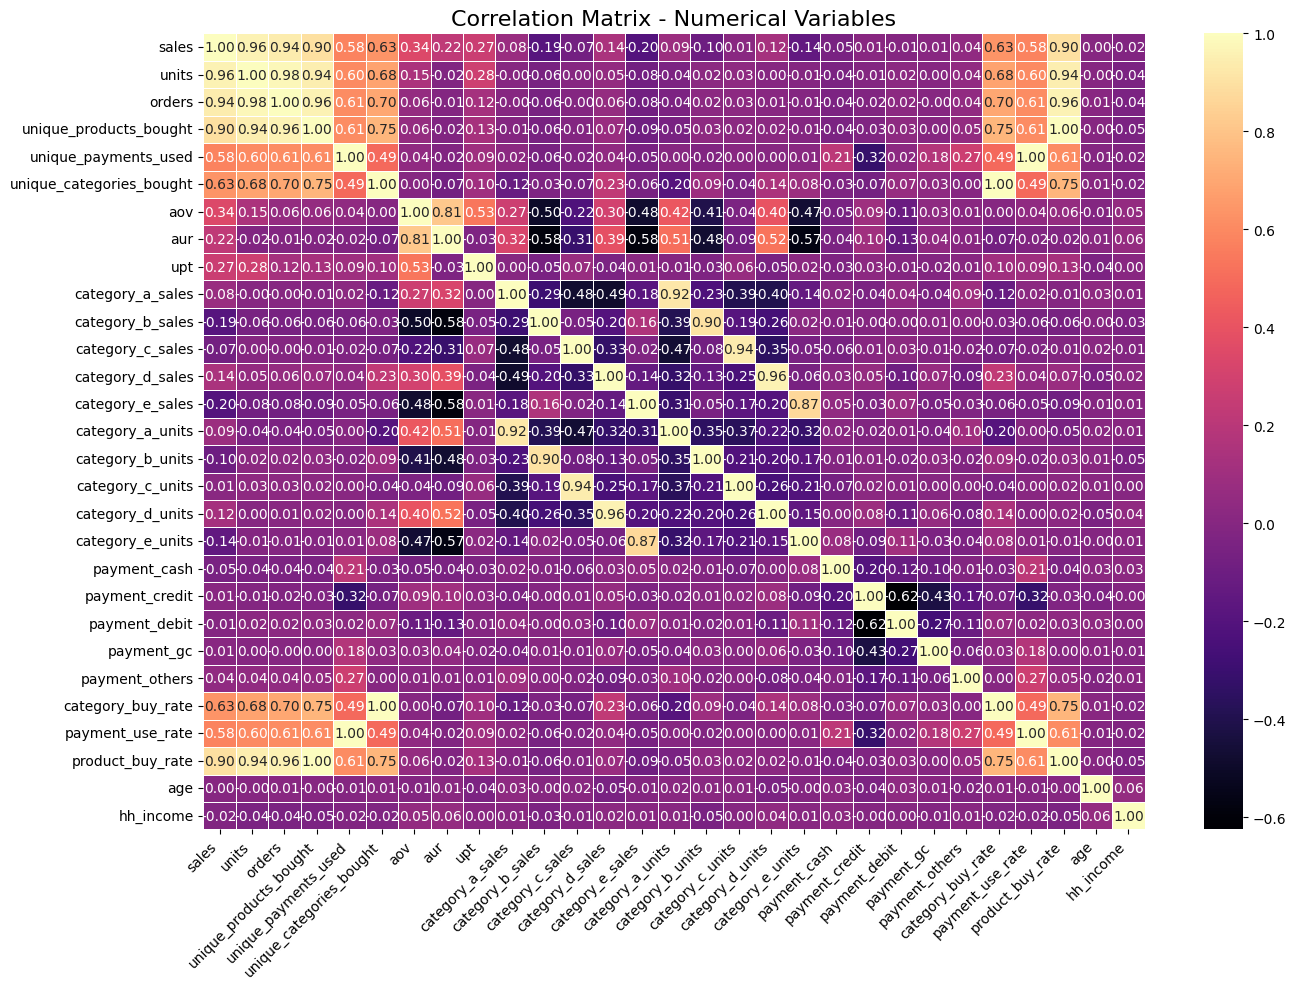

In [142]:
num_variables = num_variables = features_df4.select_dtypes(include=['int64','float64'])

correlation = num_variables.corr(method='pearson')

plt.figure(figsize=(14, 10))

sns.heatmap(correlation, annot=True, cmap='magma', fmt=".2f", linewidths=0.5)

plt.title('Correlation Matrix - Numerical Variables', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# 5.0 Data preparation

In [150]:
features_df5 = features_df4.copy()
product_df5 = product_df4.copy()
payment_df5 = payment_df4.copy()
customer_df5 = customer_df4.copy()

In [151]:
features_prep = features_df5.drop(columns=['customer_id']);

In [ ]:
numerical_data_prep = features_prep.select_dtypes(include=['int64','float64'])
bool_cols = ['email_subscribed', 'omni_shopper']

In [166]:
scalers = {}

for col in numerical_data_prep.columns:
    mn = MinMaxScaler()
    numerical_data_prep[col] = mn.fit_transform(numerical_data_prep[[col]])
    scalers[col] = mn 

with open('../scaler/scalers.pkl', 'wb') as file:
    pickle.dump(scalers, file)

In [174]:
features_final = pd.concat(
    [
        numerical_data_prep.reset_index(drop=True), 
        features_df5[bool_cols].reset_index(drop=True)
    ],
    axis=1
)

# 6.0 Space Study

In [ ]:
X = features_final.copy()

## 6.1 PCA

<BarContainer object of 31 artists>

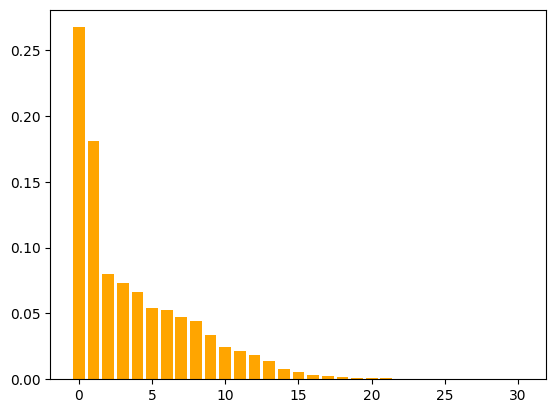

In [196]:
pca = dd.PCA(n_components=X.shape[1])

principal_components = pca.fit_transform(X)

features_pca = range(pca.n_components_)

plt.bar(features_pca, pca.explained_variance_ratio_,color='orange')

In [200]:
pca = dd.PCA(n_components=3)
pca.fit(X)

pca_ds = pd.DataFrame(pca.transform(X),columns=(['col1','col2','col3']))

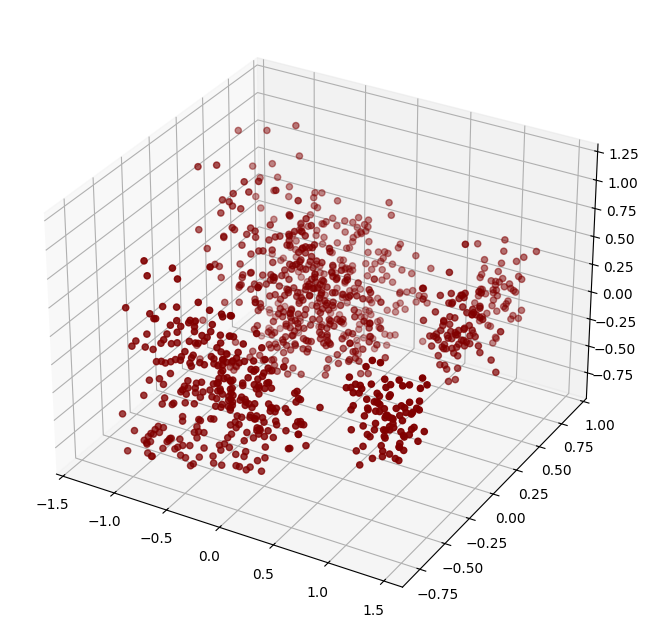

In [202]:
x = pca_ds['col1']
y = pca_ds['col2']
z = pca_ds['col3']

fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(111,projection='3d')
ax.scatter(x,y,z, c='maroon', marker='o')

 ## 6.2 T-SNE

<Axes: xlabel='embedding_x', ylabel='embedding_y'>

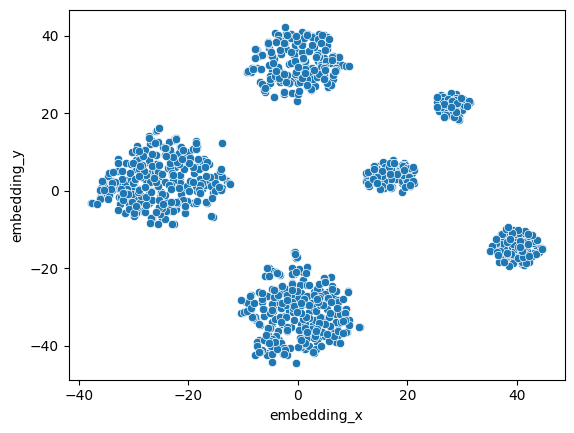

In [209]:
reducer = mn.TSNE ( n_components = 2, n_jobs = 1, random_state=42)
embedding = reducer.fit_transform(X)

df_tsne = pd.DataFrame(embedding)

df_tsne = df_tsne.rename(columns={0:'embedding_x',1:'embedding_y'})

sns.scatterplot(x='embedding_x', y='embedding_y',data=df_tsne)

## 6.3 UMAP

In [216]:
reducer = umap.UMAP(random_state=42,n_neighbors=6, min_dist=0.0,low_memory=True)
embedding = reducer.fit_transform(X)

df_umap = pd.DataFrame(embedding)
df_umap = df_umap.rename(columns={0:'embedding_x',1:'embedding_y'})

c:\Users\rafae\repos\pos_graduacao\retailx_customer_segmentation\.venv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


<Axes: xlabel='embedding_x', ylabel='embedding_y'>

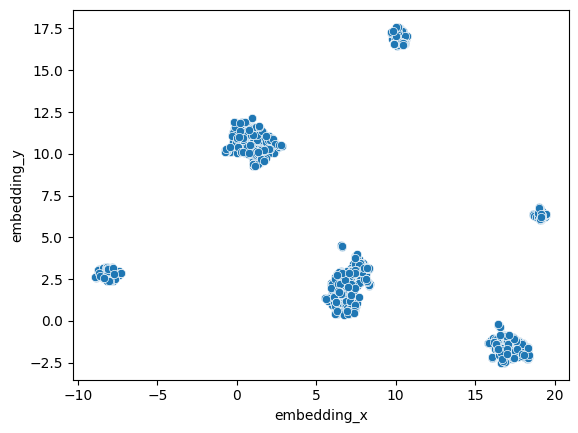

In [217]:
sns.scatterplot(x='embedding_x', y='embedding_y',data=df_umap)

# 7.0 Modelling

## 7.1 Kmeans

In [178]:
clusters = np.arange(2,50,1)

In [223]:
#X_cluster = pca_ds.copy()
X_cluster = df_umap.copy()

In [224]:
kmeans_list = []
for k in clusters:
    kmeans_model = c.KMeans(n_clusters=k)

    kmeans_model.fit(X_cluster)
    labels = kmeans_model.predict(X_cluster)

    sil = m.silhouette_score(X_cluster,labels,metric='euclidean')
    kmeans_list.append(sil)

Text(0.5, 1.0, 'Sillouette score - Kmeans')

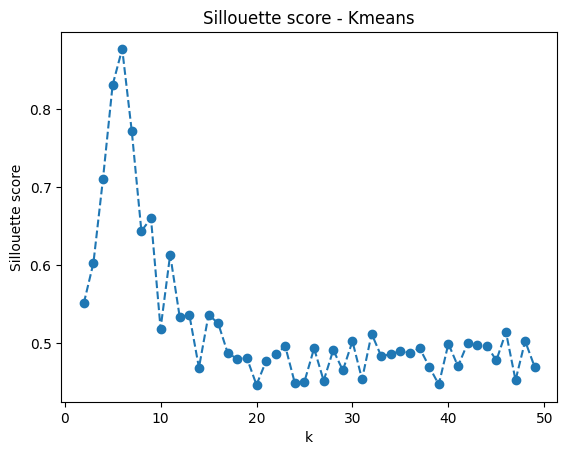

In [225]:
plt.plot(clusters, kmeans_list, linestyle='--',marker='o')
plt.xlabel('k')
plt.ylabel('Sillouette score')
plt.title('Sillouette score - Kmeans')

<Axes: xlabel='embedding_x', ylabel='embedding_y'>

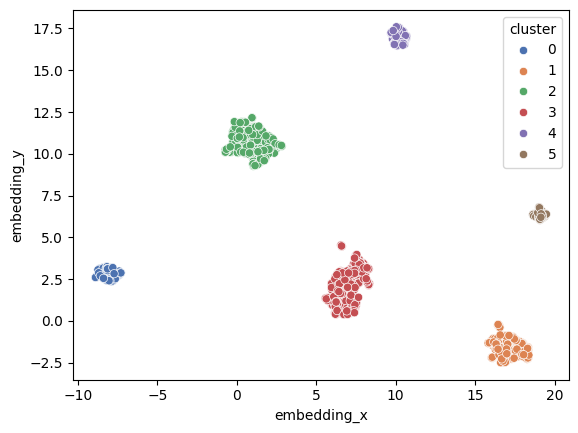

In [229]:
kmeans_model_final = c.KMeans(n_clusters=6)
kmeans_model_final.fit(X_cluster)
labels = kmeans_model_final.predict(X_cluster)
X_cluster['cluster'] = labels

sns.scatterplot(x='embedding_x',y='embedding_y',hue='cluster',data=X_cluster,palette='deep')

## 7.2 Gaussian mixture model

In [226]:
gmm_list = []
for k in clusters:
    gmm_model = mx.GaussianMixture(n_components=k)
    gmm_model.fit(X_cluster)
    labels = gmm_model.predict(X_cluster)
    sil = m.silhouette_score(X_cluster,labels,metric='euclidean')
    gmm_list.append(sil)

Text(0.5, 1.0, 'Sillouette score - GMM')

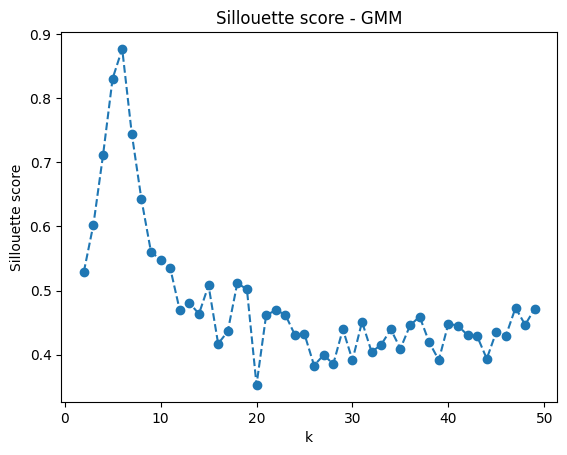

In [227]:
plt.plot(clusters, gmm_list, linestyle='--',marker='o')
plt.xlabel('k')
plt.ylabel('Sillouette score')
plt.title('Sillouette score - GMM')

<Axes: xlabel='embedding_x', ylabel='embedding_y'>

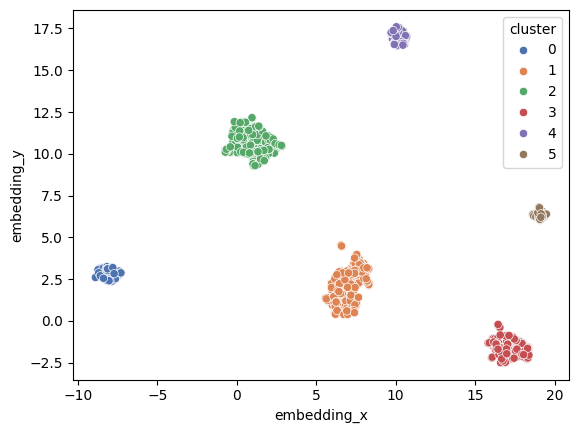

In [231]:
gmm_model_final = mx.GaussianMixture(n_components=6)
gmm_model_final.fit(X_cluster)
labels = gmm_model_final.predict(X_cluster)
X_cluster['cluster'] = labels

sns.scatterplot(x='embedding_x',y='embedding_y',hue='cluster',data=X_cluster,palette='deep')

# 8. Model Training

In [232]:
reducer = umap.UMAP(random_state=42,n_neighbors=6, min_dist=0.0,low_memory=True)
embedding = reducer.fit_transform(X)

with open('umap_reducer.pkl','wb') as f:
    pickle.dump(reducer, f)

c:\Users\rafae\repos\pos_graduacao\retailx_customer_segmentation\.venv\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [233]:
with open('umap_reducer.pkl','rb') as f:
    umap_reducer = pickle.load(f)

embedding_final = umap_reducer.transform(features_final)
embedding_final = pd.DataFrame(embedding_final,columns=['embedding_x','embedding_y'])

kmeans_model = c.KMeans(n_clusters=6)

kmeans_model.fit(embedding_final)
lebels = kmeans_model.predict(embedding_final)

<Axes: xlabel='embedding_x', ylabel='embedding_y'>

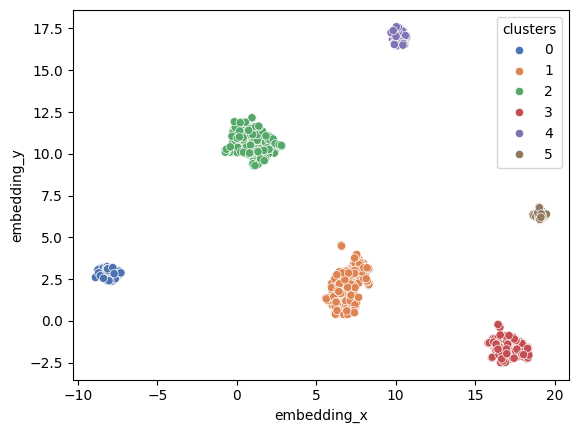

In [ ]:
response = embedding_final.copy()
response['clusters'] = labels

sns.scatterplot(x='embedding_x',y='embedding_y',hue='clusters',data=response,palette='deep')